In [1]:
# ÂØºÂÖ•Áõ∏ÂÖ≥ÂåÖ
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='SimHei', size=13)

import os,gc,re,warnings,sys
warnings.filterwarnings("ignore")

In [2]:
# ËØªÂèñÊï∞ÊçÆ
path = './data_raw/'

#####train
trn_click = pd.read_csv(path+'train_click_log.csv')
item_df = pd.read_csv(path+'articles.csv')
item_df = item_df.rename(columns={'article_id': 'click_article_id'})  #ÈáçÂëΩÂêçÔºåÊñπ‰æøÂêéÁª≠match
item_emb_df = pd.read_csv(path+'articles_emb.csv')

#####test
tst_click = pd.read_csv(path+'testA_click_log.csv')

In [3]:
# Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

# ÂØπÊØè‰∏™Áî®Êà∑ÁöÑÁÇπÂáªÊó∂Èó¥Êà≥ËøõË°åÊéíÂ∫è
trn_click['rank'] = trn_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)
tst_click['rank'] = tst_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)

#ËÆ°ÁÆóÁî®Êà∑ÁÇπÂáªÊñáÁ´†ÁöÑÊ¨°Êï∞ÔºåÂπ∂Ê∑ªÂä†Êñ∞ÁöÑ‰∏ÄÂàócount
trn_click['click_cnts'] = trn_click.groupby(['user_id'])['click_timestamp'].transform('count')
tst_click['click_cnts'] = tst_click.groupby(['user_id'])['click_timestamp'].transform('count')

In [4]:
# Áî®Êà∑ÁÇπÂáªÊó•ÂøóÊñá‰ª∂_ËÆ≠ÁªÉÈõÜ
trn_click = trn_click.merge(item_df, how='left', on=['click_article_id'])
trn_click.head()

user_id  click_article_id  click_timestamp  click_environment  \
0   199999            160417    1507029570190                  4   
1   199999              5408    1507029571478                  4   
2   199999             50823    1507029601478                  4   
3   199998            157770    1507029532200                  4   
4   199998             96613    1507029671831                  4   

   click_deviceGroup  click_os  click_country  click_region  \
0                  1        17              1            13   
1                  1        17              1            13   
2                  1        17              1            13   
3                  1        17              1            25   
4                  1        17              1            25   

   click_referrer_type  rank  click_cnts  category_id  created_at_ts  \
0                    1    11          11          281  1506942089000   
1                    1    10          11            4  1506994257000   
2                    1     9          11           99  1507013614000   
3                    5    40          40          281  1506983935000   
4                    5    39          40          209  1506938444000   

   words_count  
0          173  
1          118  
2          213  
3          201  
4          185

In [5]:
#Áî®Êà∑ÁÇπÂáªÊó•Âøó‰ø°ÊÅØ
trn_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112623 entries, 0 to 1112622
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   user_id              1112623 non-null  int64
 1   click_article_id     1112623 non-null  int64
 2   click_timestamp      1112623 non-null  int64
 3   click_environment    1112623 non-null  int64
 4   click_deviceGroup    1112623 non-null  int64
 5   click_os             1112623 non-null  int64
 6   click_country        1112623 non-null  int64
 7   click_region         1112623 non-null  int64
 8   click_referrer_type  1112623 non-null  int64
 9   rank                 1112623 non-null  int32
 10  click_cnts           1112623 non-null  int64
 11  category_id          1112623 non-null  int64
 12  created_at_ts        1112623 non-null  int64
 13  words_count          1112623 non-null  int64
dtypes: int32(1), int64(13)
memory usage: 114.6 MB


In [6]:
trn_click.describe()

user_id  click_article_id  click_timestamp  click_environment  \
count  1.112623e+06      1.112623e+06     1.112623e+06       1.112623e+06   
mean   1.221198e+05      1.951541e+05     1.507588e+12       3.947786e+00   
std    5.540349e+04      9.292286e+04     3.363466e+08       3.276715e-01   
min    0.000000e+00      3.000000e+00     1.507030e+12       1.000000e+00   
25%    7.934700e+04      1.239090e+05     1.507297e+12       4.000000e+00   
50%    1.309670e+05      2.038900e+05     1.507596e+12       4.000000e+00   
75%    1.704010e+05      2.777120e+05     1.507841e+12       4.000000e+00   
max    1.999990e+05      3.640460e+05     1.510603e+12       4.000000e+00   

       click_deviceGroup      click_os  click_country  click_region  \
count       1.112623e+06  1.112623e+06   1.112623e+06  1.112623e+06   
mean        1.815981e+00  1.301976e+01   1.310776e+00  1.813587e+01   
std         1.035170e+00  6.967844e+00   1.618264e+00  7.105832e+00   
min         1.000000e+00  2.000000e+00   1.000000e+00  1.000000e+00   
25%         1.000000e+00  2.000000e+00   1.000000e+00  1.300000e+01   
50%         1.000000e+00  1.700000e+01   1.000000e+00  2.100000e+01   
75%         3.000000e+00  1.700000e+01   1.000000e+00  2.500000e+01   
max         5.000000e+00  2.000000e+01   1.100000e+01  2.800000e+01   

       click_referrer_type          rank    click_cnts   category_id  \
count         1.112623e+06  1.112623e+06  1.112623e+06  1.112623e+06   
mean          1.910063e+00  7.118518e+00  1.323704e+01  3.056176e+02   
std           1.220012e+00  1.016095e+01  1.631503e+01  1.155791e+02   
min           1.000000e+00  1.000000e+00  2.000000e+00  1.000000e+00   
25%           1.000000e+00  2.000000e+00  4.000000e+00  2.500000e+02   
50%           2.000000e+00  4.000000e+00  8.000000e+00  3.280000e+02   
75%           2.000000e+00  8.000000e+00  1.600000e+01  4.100000e+02   
max           7.000000e+00  2.410000e+02  2.410000e+02  4.600000e+02   

       created_at_ts   words_count  
count   1.112623e+06  1.112623e+06  
mean    1.506598e+12  2.011981e+02  
std     8.343066e+09  5.223881e+01  
min     1.166573e+12  0.000000e+00  
25%     1.507220e+12  1.700000e+02  
50%     1.507553e+12  1.970000e+02  
75%     1.507756e+12  2.280000e+02  
max     1.510666e+12  6.690000e+03

In [7]:
#ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÁî®Êà∑Êï∞Èáè‰∏∫20w
trn_click.user_id.nunique()

200000

In [8]:
trn_click.groupby('user_id')['click_article_id'].count().min()  # ËÆ≠ÁªÉÈõÜÈáåÈù¢ÊØè‰∏™Áî®Êà∑Ëá≥Â∞ëÁÇπÂáª‰∫Ü‰∏§ÁØáÊñáÁ´†

2

<Figure size 640x480 with 0 Axes>

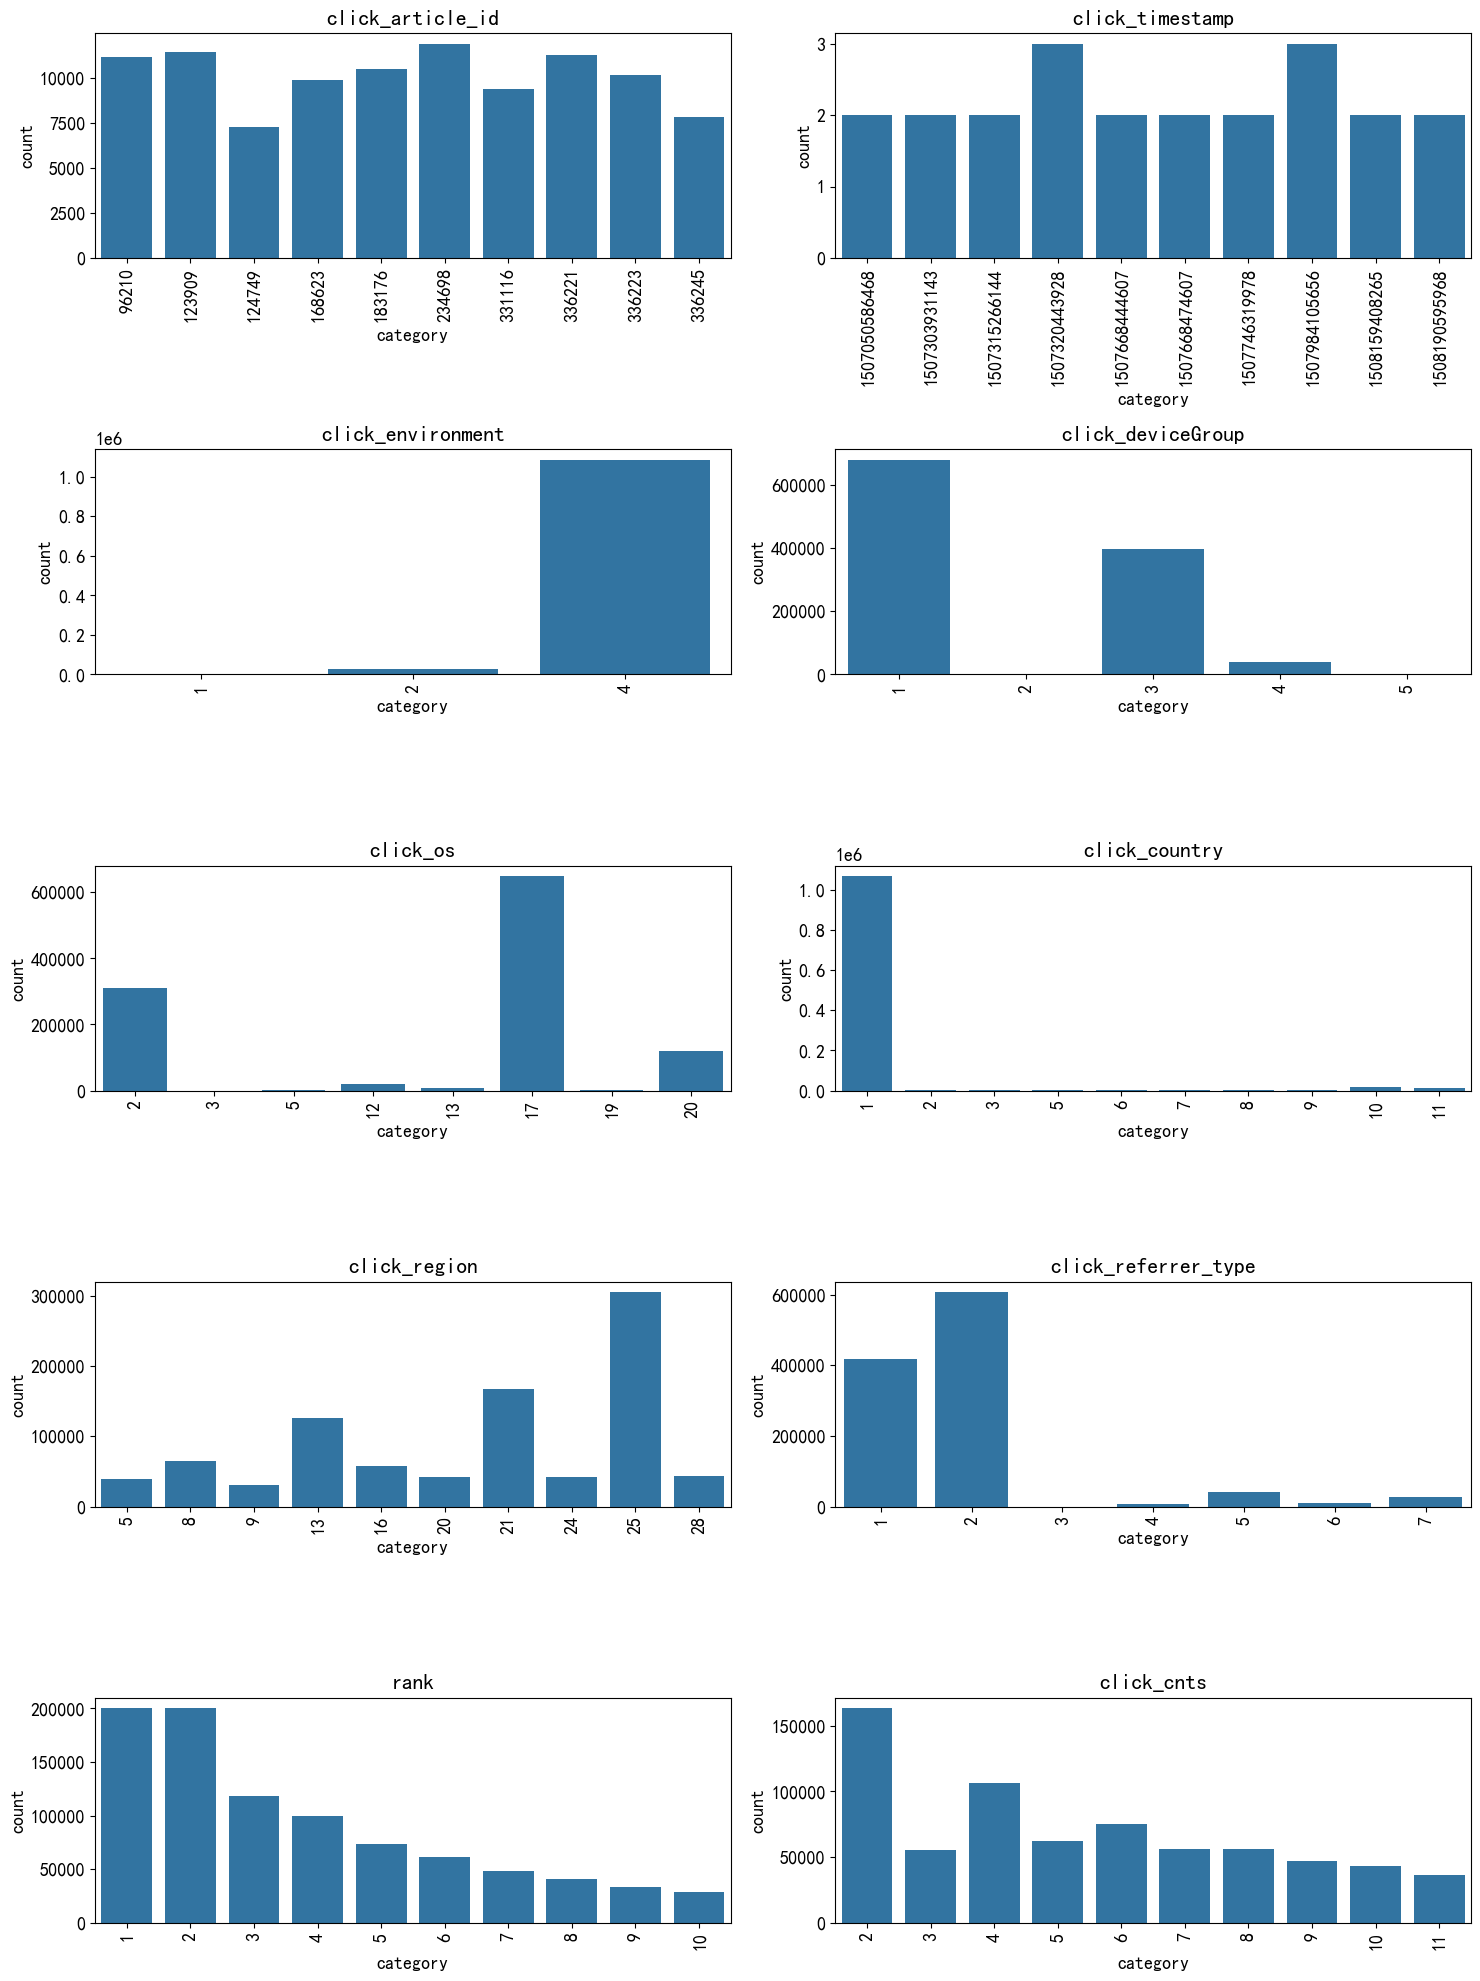

In [12]:
# ÁîªÁõ¥ÊñπÂõæ
plt.figure()
plt.figure(figsize=(15, 20))
i = 1
for col in ['click_article_id', 'click_timestamp', 'click_environment', 'click_deviceGroup', 'click_os', 'click_country', 
            'click_region', 'click_referrer_type', 'rank', 'click_cnts']:
    plot_envs = plt.subplot(5, 2, i)
    i += 1
    v = trn_click[col].value_counts().reset_index()[:10]  # ËÆ°ÁÆó top10
    v.columns = ['category', 'count']  # ÊòéÁ°ÆÂàóÂêçÔºåÁ°Æ‰øù `count` ‰ª£Ë°®Êï∞Èáè

    fig = sns.barplot(x=v['category'], y=v['count'])  # Ê≠£Á°ÆÂåπÈÖç x Âíå y
    for item in fig.get_xticklabels():
        item.set_rotation(90)
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
#Êñ∞ÈóªÊñáÁ´†Êï∞ÊçÆÈõÜÊµèËßà
pd.concat([item_df.head(), item_df.tail()])

click_article_id  category_id  created_at_ts  words_count
0                      0            0  1513144419000          168
1                      1            1  1405341936000          189
2                      2            1  1408667706000          250
3                      3            1  1408468313000          230
4                      4            1  1407071171000          162
364042            364042          460  1434034118000          144
364043            364043          460  1434148472000          463
364044            364044          460  1457974279000          177
364045            364045          460  1515964737000          126
364046            364046          460  1505811330000          479

ÊúÄÊó©ÂèëÂ∏ÉÊó∂Èó¥ 2006-09-27 11:14:35
ÊúÄÊôöÂèëÂ∏ÉÊó∂Èó¥ 2018-03-13 12:12:30


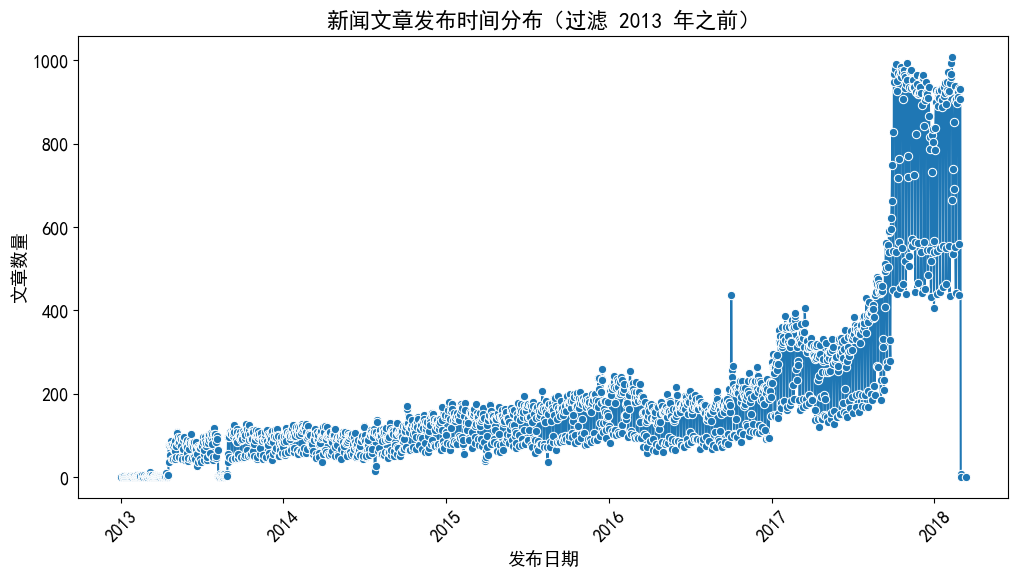

In [22]:
# Êñ∞ÈóªÊñáÁ´†ÂèëÂ∏ÉÊó∂Èó¥ÂàÜÂ∏É
news_min_time = item_df['created_at_ts'].min()
news_max_time = item_df['created_at_ts'].max()

print("ÊúÄÊó©ÂèëÂ∏ÉÊó∂Èó¥", pd.to_datetime(news_min_time, unit = 'ms'))
print("ÊúÄÊôöÂèëÂ∏ÉÊó∂Èó¥", pd.to_datetime(news_max_time, unit = 'ms'))

# 1Ô∏è‚É£ ËøáÊª§Êéâ 2013 Âπ¥‰πãÂâçÁöÑÊñ∞Èóª
filtered_item_df = item_df[pd.to_datetime(item_df['created_at_ts'], unit='ms') >= '2013-01-01']

# 2Ô∏è‚É£ ÈáçÊñ∞ÊåâÊó•ÊúüÁªüËÆ°Êñ∞ÈóªÂèëÂ∏ÉÊó∂Èó¥
filtered_item_df['creat_date'] = pd.to_datetime(filtered_item_df['created_at_ts'], unit='ms').dt.date
news_per_day = filtered_item_df.groupby('creat_date').size()

# 3Ô∏è‚É£ ÁªòÂà∂Êñ∞ÈóªÂèëÂ∏ÉÊó∂Èó¥ÁöÑÂàÜÂ∏ÉÊõ≤Á∫ø
plt.figure(figsize=(12, 6))
sns.lineplot(x=news_per_day.index, y=news_per_day.values, marker='o')

plt.xlabel("ÂèëÂ∏ÉÊó•Êúü")
plt.ylabel("ÊñáÁ´†Êï∞Èáè")
plt.title("Êñ∞ÈóªÊñáÁ´†ÂèëÂ∏ÉÊó∂Èó¥ÂàÜÂ∏ÉÔºàËøáÊª§ 2013 Âπ¥‰πãÂâçÔºâ")
plt.xticks(rotation=45)
plt.show()

ÊúÄÂ∞èÂ≠óÊï∞ 0
ÊúÄÂ§ßÂ≠óÊï∞ 6690


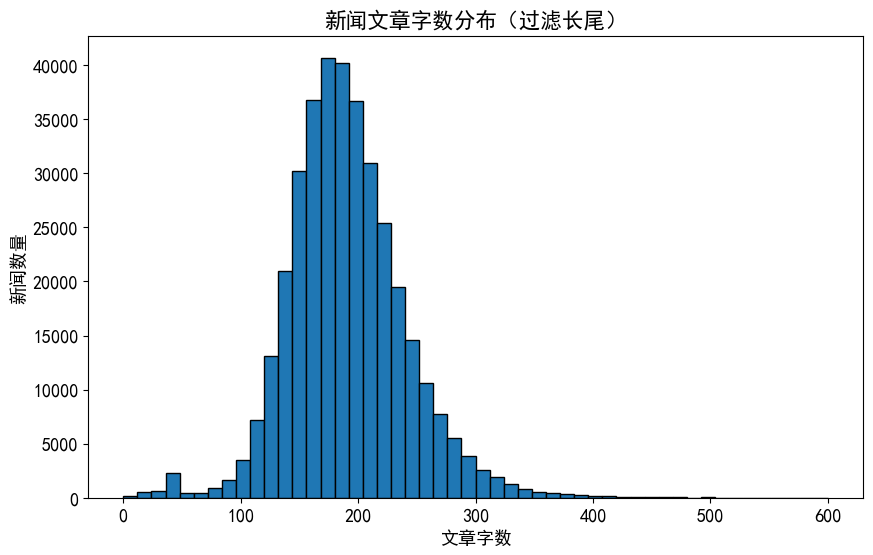

In [21]:
# Êñ∞ÈóªÊñáÁ´†Â≠óÊï∞ÂàÜÂ∏É
news_min_words_cnt = item_df['words_count'].min()
news_max_words_cnt = item_df['words_count'].max()

print("ÊúÄÂ∞èÂ≠óÊï∞", news_min_words_cnt)
print("ÊúÄÂ§ßÂ≠óÊï∞", news_max_words_cnt) 

news_words_count = item_df.groupby('words_count').size()
plt.figure(figsize=(10, 6))
# ËøáÊª§ÊéâÂ≠óÊï∞ > 1000 ÁöÑÂºÇÂ∏∏Êï∞ÊçÆ
filtered_data = item_df[item_df['words_count'] <= 600]

plt.hist(filtered_data['words_count'], bins=50, edgecolor='black')

plt.xlabel("ÊñáÁ´†Â≠óÊï∞")
plt.ylabel("Êñ∞ÈóªÊï∞Èáè")
plt.title("Êñ∞ÈóªÊñáÁ´†Â≠óÊï∞ÂàÜÂ∏ÉÔºàËøáÊª§ÈïøÂ∞æÔºâ")
plt.show()


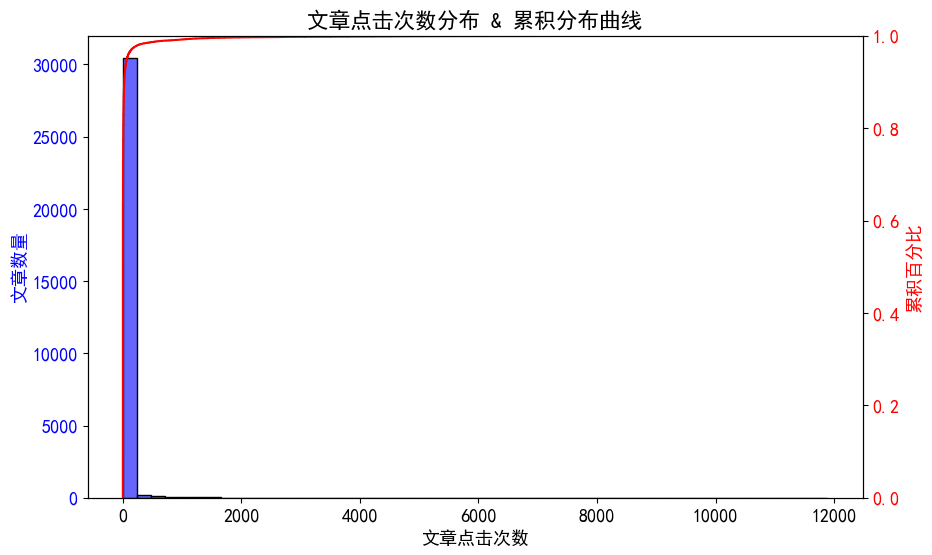

In [14]:

# ÁªüËÆ°ÊØèÁØáÊñáÁ´†ÁöÑÁÇπÂáªÊ¨°Êï∞
article_click_counts = trn_click['click_article_id'].value_counts()

# ÂàõÂª∫ÂõæÂΩ¢
fig, ax1 = plt.subplots(figsize=(10, 6))

# ÁªòÂà∂ Áõ¥ÊñπÂõæÔºàÂ∑¶ËΩ¥Ôºâ
sns.histplot(article_click_counts, bins=50, kde=False, ax=ax1, color="blue", alpha=0.6)
ax1.set_xlabel("ÊñáÁ´†ÁÇπÂáªÊ¨°Êï∞")
ax1.set_ylabel("ÊñáÁ´†Êï∞Èáè", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# ÂàõÂª∫Á¨¨‰∫å‰∏™ y ËΩ¥ÔºåÁî®‰∫éÁªòÂà∂Á¥ØËÆ°ÂàÜÂ∏ÉÊõ≤Á∫ø
ax2 = ax1.twinx()
sns.ecdfplot(article_click_counts, ax=ax2, color="red")  # Âè†Âä†Á¥ØÁßØÂàÜÂ∏ÉÊõ≤Á∫ø
ax2.set_ylabel("Á¥ØÁßØÁôæÂàÜÊØî", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("ÊñáÁ´†ÁÇπÂáªÊ¨°Êï∞ÂàÜÂ∏É & Á¥ØÁßØÂàÜÂ∏ÉÊõ≤Á∫ø")
plt.show()


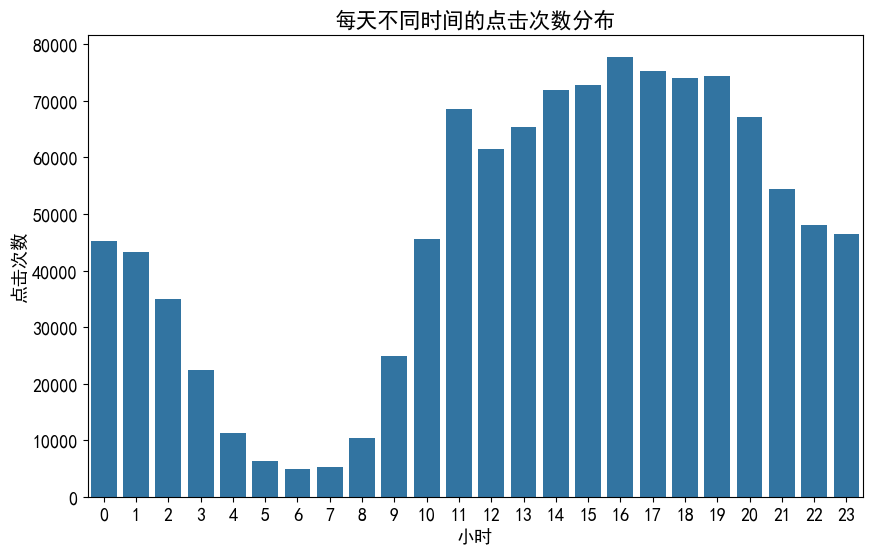

In [18]:
trn_click['click_timestamp'] = trn_click['click_timestamp'] // 1000  # ÂÖàËΩ¨Êç¢‰∏∫Áßí
trn_click['click_hour'] = pd.to_datetime(trn_click['click_timestamp'], unit='s').dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x=trn_click['click_hour'])
plt.xlabel("Â∞èÊó∂")
plt.ylabel("ÁÇπÂáªÊ¨°Êï∞")
plt.title("ÊØèÂ§©‰∏çÂêåÊó∂Èó¥ÁöÑÁÇπÂáªÊ¨°Êï∞ÂàÜÂ∏É")
plt.show()

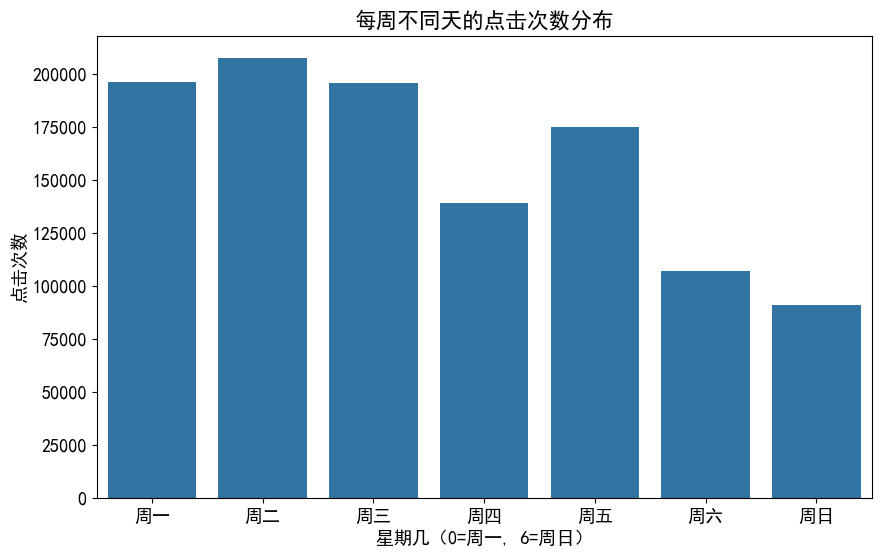

In [20]:
trn_click['click_weekday'] = pd.to_datetime(trn_click['click_timestamp'], unit='s').dt.weekday

plt.figure(figsize=(10, 6))
sns.countplot(x=trn_click['click_weekday'], order=[0, 1, 2, 3, 4, 5, 6])  # Á°Æ‰øùÊåâÊòüÊúüÈ°∫Â∫èÊéíÂàó
plt.xlabel("ÊòüÊúüÂá†Ôºà0=Âë®‰∏Ä, 6=Âë®Êó•Ôºâ")
plt.ylabel("ÁÇπÂáªÊ¨°Êï∞")
plt.title("ÊØèÂë®‰∏çÂêåÂ§©ÁöÑÁÇπÂáªÊ¨°Êï∞ÂàÜÂ∏É")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Âë®‰∏Ä", "Âë®‰∫å", "Âë®‰∏â", "Âë®Âõõ", "Âë®‰∫î", "Âë®ÂÖ≠", "Âë®Êó•"])  # ÊòæÁ§∫‰∏≠Êñá
plt.show()

In [21]:
tst_click = tst_click.merge(item_df, how='left', on=['click_article_id'])
tst_click.describe()

user_id  click_article_id  click_timestamp  click_environment  \
count  518010.000000     518010.000000     5.180100e+05      518010.000000   
mean   227342.428169     193803.792550     1.507387e+12           3.947300   
std     14613.907188      88279.388177     3.706127e+08           0.323916   
min    200000.000000        137.000000     1.506959e+12           1.000000   
25%    214926.000000     128551.000000     1.507026e+12           4.000000   
50%    229109.000000     199197.000000     1.507308e+12           4.000000   
75%    240182.000000     272143.000000     1.507666e+12           4.000000   
max    249999.000000     364043.000000     1.508832e+12           4.000000   

       click_deviceGroup       click_os  click_country   click_region  \
count      518010.000000  518010.000000  518010.000000  518010.000000   
mean            1.738285      13.628467       1.348209      18.250250   
std             1.020858       6.625564       1.703524       7.060798   
min             1.000000       2.000000       1.000000       1.000000   
25%             1.000000      12.000000       1.000000      13.000000   
50%             1.000000      17.000000       1.000000      21.000000   
75%             3.000000      17.000000       1.000000      25.000000   
max             5.000000      20.000000      11.000000      28.000000   

       click_referrer_type           rank     click_cnts    category_id  \
count        518010.000000  518010.000000  518010.000000  518010.000000   
mean              1.819614      15.521785      30.043586     305.324961   
std               1.082657      33.957702      56.868021     110.411513   
min               1.000000       1.000000       1.000000       1.000000   
25%               1.000000       4.000000      10.000000     252.000000   
50%               2.000000       8.000000      19.000000     323.000000   
75%               2.000000      18.000000      35.000000     399.000000   
max               7.000000     938.000000     938.000000     460.000000   

       created_at_ts    words_count  
count   5.180100e+05  518010.000000  
mean    1.506883e+12     210.966331  
std     5.816668e+09      83.040065  
min     1.265812e+12       0.000000  
25%     1.506970e+12     176.000000  
50%     1.507249e+12     199.000000  
75%     1.507630e+12     232.000000  
max     1.509949e+12    3082.000000

trainÊúÄÊó©Êó∂Èó¥ 2017-10-03 11:18:52.200000
trainÊúÄÊôöÊó∂Èó¥ 2017-11-13 20:04:14.886000
testAÊúÄÊó©Êó∂Èó¥ 2017-10-02 15:44:10.386000
testAÊúÄÊôöÊó∂Èó¥ 2017-10-24 07:56:58.749000


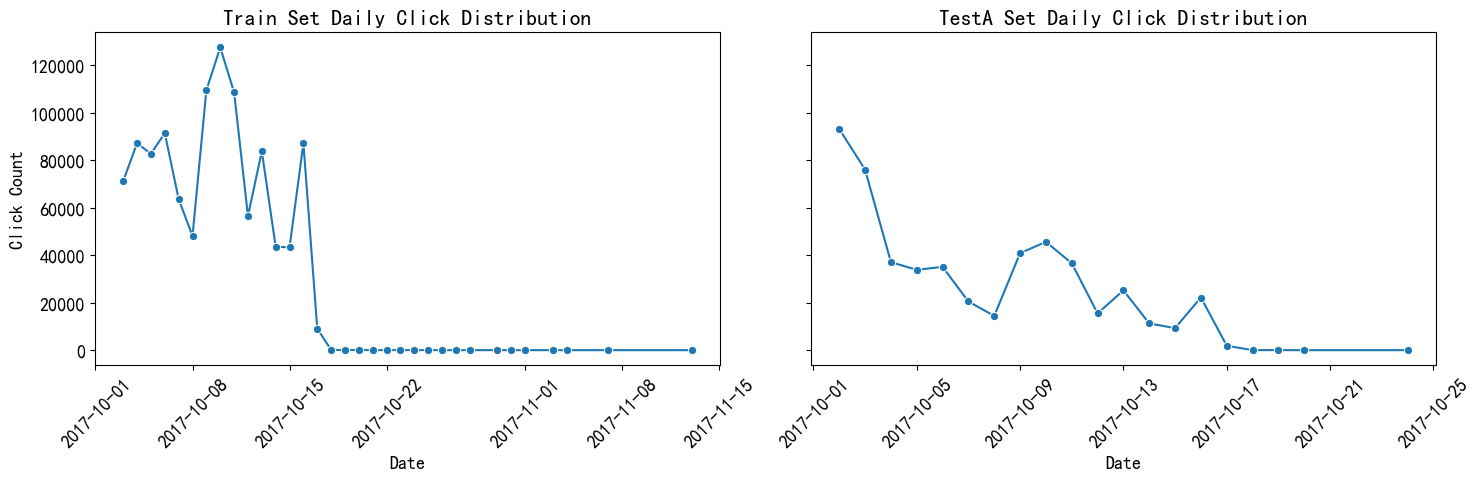

In [9]:
# ÊñáÁ´†Ë¢´ÁÇπÂáªÁöÑÊó∂Èó¥ÂàÜÂ∏É
trn_min_time = trn_click['click_timestamp'].min()
trn_max_time = trn_click['click_timestamp'].max()
tst_min_time = tst_click['click_timestamp'].min()
tst_max_time = tst_click['click_timestamp'].max()

print("trainÊúÄÊó©Êó∂Èó¥", pd.to_datetime(trn_min_time, unit = 'ms'))
print("trainÊúÄÊôöÊó∂Èó¥", pd.to_datetime(trn_max_time, unit = 'ms'))
print("testAÊúÄÊó©Êó∂Èó¥", pd.to_datetime(tst_min_time, unit = 'ms'))
print("testAÊúÄÊôöÊó∂Èó¥", pd.to_datetime(tst_max_time, unit = 'ms'))


# 1Ô∏è‚É£ Á°Æ‰øù click_timestamp ÊòØÊØ´ÁßíÊó∂Èó¥Êà≥ÔºåÂπ∂ËΩ¨Êç¢‰∏∫Êó•Êúü
trn_click['click_date'] = pd.to_datetime(trn_click['click_timestamp'], unit='ms').dt.date
tst_click['click_date'] = pd.to_datetime(tst_click['click_timestamp'], unit='ms').dt.date

# 2Ô∏è‚É£ ÊåâÊó•ÊúüÁªüËÆ°ÁÇπÂáªÈáè
train_clicks_per_day = trn_click.groupby('click_date').size()
testA_clicks_per_day = tst_click.groupby('click_date').size()

# 3Ô∏è‚É£ ÁªòÂà∂ÂèåÂ≠êÂõæÔºöÂ∑¶ËæπÊòØËÆ≠ÁªÉÈõÜÔºåÂè≥ËæπÊòØÊµãËØïÈõÜ A
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# üìå ËÆ≠ÁªÉÈõÜÁÇπÂáªË∂ãÂäø
sns.lineplot(ax=axes[0], x=train_clicks_per_day.index, y=train_clicks_per_day.values, marker='o')
axes[0].set_title("Train Set Daily Click Distribution")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Click Count")
axes[0].tick_params(axis='x', rotation=45)

# üìå ÊµãËØïÈõÜ A ÁÇπÂáªË∂ãÂäø
sns.lineplot(ax=axes[1], x=testA_clicks_per_day.index, y=testA_clicks_per_day.values, marker='o')
axes[1].set_title("TestA Set Daily Click Distribution")
axes[1].set_xlabel("Date")
axes[1].tick_params(axis='x', rotation=45)

# 4Ô∏è‚É£ ÁæéÂåñÂ∏ÉÂ±Ä
plt.tight_layout()
plt.show()

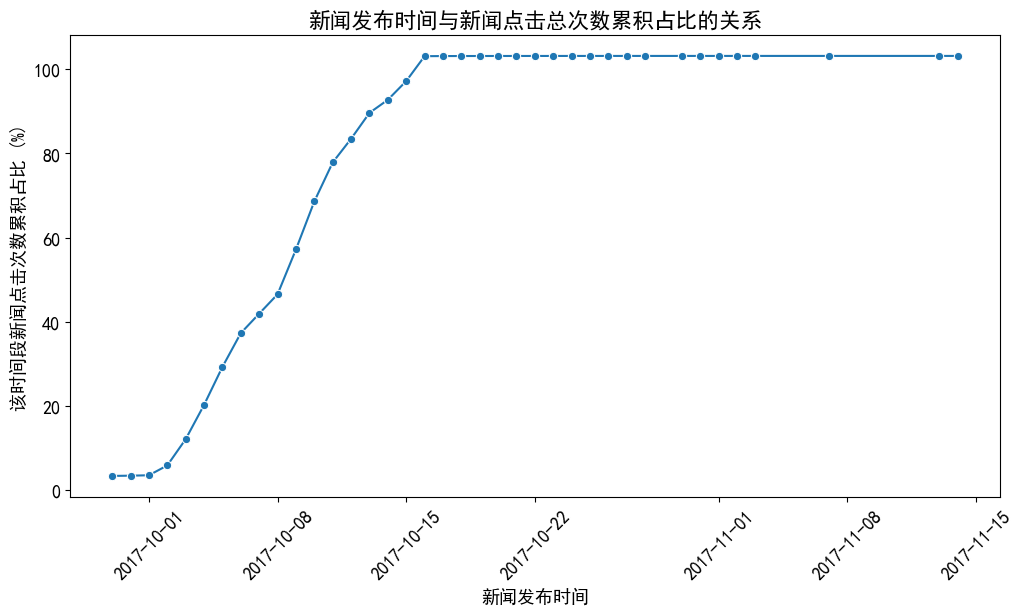

In [40]:
# 1Ô∏è‚É£ Á°Æ‰øù created_at_ts ÊòØÊØ´ÁßíÊó∂Èó¥Êà≥ÔºåÂπ∂ËΩ¨Êç¢‰∏∫Êó•Êúü
item_df['create_date'] = pd.to_datetime(item_df['created_at_ts'], unit='ms').dt.date

# 2Ô∏è‚É£ ÁªüËÆ°ÊØè‰∏™Êó•ÊúüÂèëÂ∏ÉÁöÑÊñ∞ÈóªË¢´ÁÇπÂáªÁöÑÊÄªÊ¨°Êï∞
news_clicks_per_day = trn_click.merge(item_df[['click_article_id', 'create_date']], 
                                      left_on='click_article_id', right_on='click_article_id')
news_clicks_per_day = news_clicks_per_day.groupby('create_date').size()

# 3Ô∏è‚É£ ËøáÊª§Êéâ 2017-09-29 ‰πãÂâçÁöÑÊï∞ÊçÆ
news_clicks_per_day = news_clicks_per_day[news_clicks_per_day.index >= pd.to_datetime('2017-09-29').date()]

# 4Ô∏è‚É£ ËÆ°ÁÆóÁ¥ØÁßØÁôæÂàÜÊØî
total_clicks = news_clicks_per_day.sum()
news_clicks_cumsum = news_clicks_per_day.cumsum() / total_clicks * 100

# 5Ô∏è‚É£ ËÆ°ÁÆó 2017-09-29 ‰πãÂâçÁöÑÁÇπÂáªË¥°ÁåÆÔºåÂπ∂Âä†Âà∞Á¥ØÁßØÊõ≤Á∫ø‰∏ä
pre_2017_clicks = trn_click.merge(item_df[['click_article_id', 'create_date']], 
                                  left_on='click_article_id', right_on='click_article_id')
pre_2017_clicks = pre_2017_clicks[pre_2017_clicks['create_date'] < pd.to_datetime('2017-09-29').date()]
pre_2017_percentage = pre_2017_clicks.shape[0] / total_clicks * 100

news_clicks_cumsum += pre_2017_percentage  # Á°Æ‰øùËµ∑ÂßãÂÄºÂåÖÂê´‰πãÂâçÊñáÁ´†ÁöÑË¥°ÁåÆ

# 6Ô∏è‚É£ ÁªòÂà∂Êñ∞ÈóªÂèëÂ∏ÉÊó∂Èó¥‰∏éÊñ∞ÈóªÁÇπÂáªÊÄªÊ¨°Êï∞Á¥ØÁßØÁôæÂàÜÊØîÁöÑÂÖ≥Á≥ª
plt.figure(figsize=(12,6))
sns.lineplot(x=news_clicks_cumsum.index, y=news_clicks_cumsum.values, marker='o')

plt.xlabel("Êñ∞ÈóªÂèëÂ∏ÉÊó∂Èó¥")
plt.ylabel("ËØ•Êó∂Èó¥ÊÆµÊñ∞ÈóªÁÇπÂáªÊ¨°Êï∞Á¥ØÁßØÂç†ÊØî (%)")
plt.title("Êñ∞ÈóªÂèëÂ∏ÉÊó∂Èó¥‰∏éÊñ∞ÈóªÁÇπÂáªÊÄªÊ¨°Êï∞Á¥ØÁßØÂç†ÊØîÁöÑÂÖ≥Á≥ª")
plt.xticks(rotation=45)
plt.show()

In [6]:
#####merge
user_click_merge = pd.concat([trn_click, tst_click], ignore_index=True)
#Áî®Êà∑ÈáçÂ§çÁÇπÂáª
user_click_count = user_click_merge.groupby(['user_id', 'click_article_id'])['click_timestamp'].agg({'count'}).reset_index()
user_click_count[:10]

user_id  click_article_id  count
0        0             30760      1
1        0            157507      1
2        1             63746      1
3        1            289197      1
4        2             36162      1
5        2            168401      1
6        3             36162      1
7        3             50644      1
8        4             39894      1
9        4             42567      1

In [7]:
user_click_count[user_click_count['count']>7]

user_id  click_article_id  count
311242    86295             74254     10
311243    86295             76268     10
393761   103237            205948     10
393763   103237            235689     10
576902   134850             69463     13

In [8]:
user_click_count['count'].unique()

array([ 1,  2,  4,  3,  6,  5, 10,  7, 13], dtype=int64)

In [9]:
#Áî®Êà∑ÁÇπÂáªÊñ∞ÈóªÊ¨°Êï∞
user_click_count.loc[:,'count'].value_counts() 

count
1     1605541
2       11621
3         422
4          77
5          26
6          12
10          4
7           3
13          1
Name: count, dtype: int64

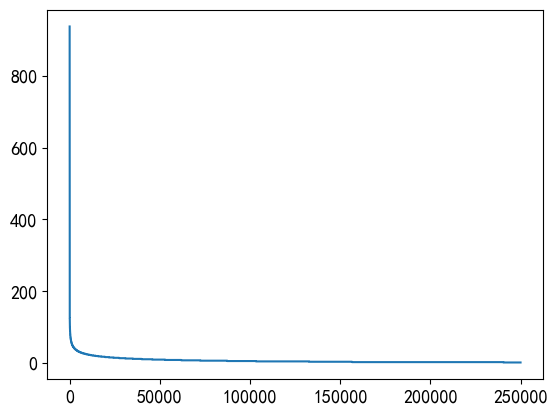

In [7]:
###Áî®Êà∑ÁÇπÂáªÊñ∞ÈóªÊï∞ÈáèÁöÑÂàÜÂ∏É
user_click_item_count = sorted(user_click_merge.groupby('user_id')['click_article_id'].count(), reverse=True)
plt.plot(user_click_item_count)

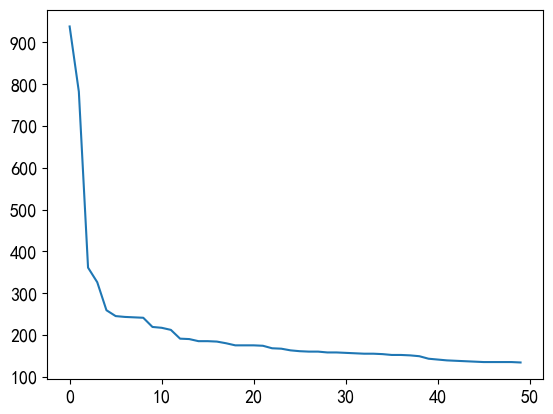

In [8]:
#ÁÇπÂáªÊ¨°Êï∞Âú®Ââç50ÁöÑÁî®Êà∑
plt.plot(user_click_item_count[:50])

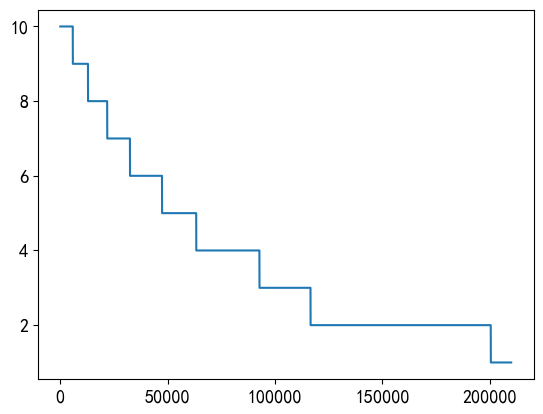

In [19]:
#ÁÇπÂáªÊ¨°Êï∞ÊéíÂêçÂú®[25000:50000]‰πãÈó¥
plt.plot(user_click_item_count[40000:250000])

In [20]:
item_click_count = sorted(user_click_merge.groupby('click_article_id')['user_id'].count(), reverse=True)

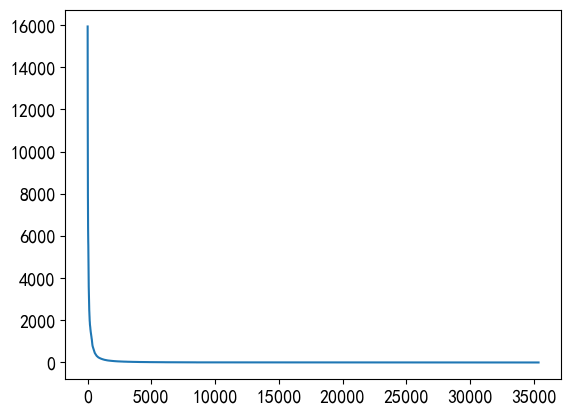

In [21]:
plt.plot(item_click_count)

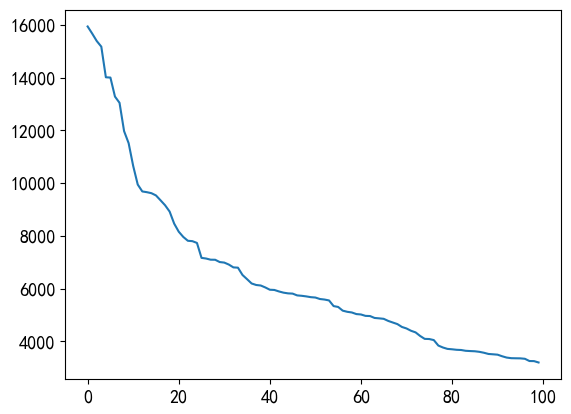

In [22]:
plt.plot(item_click_count[:100])

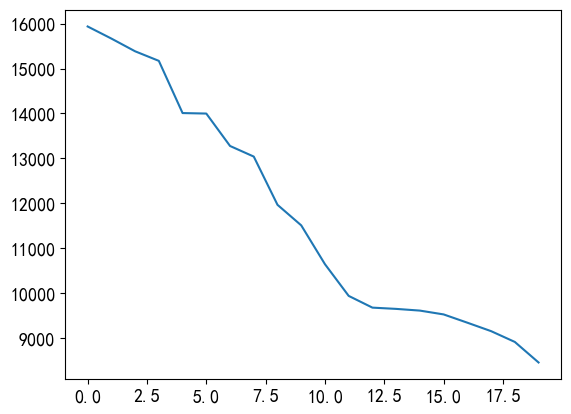

In [23]:
plt.plot(item_click_count[:20])

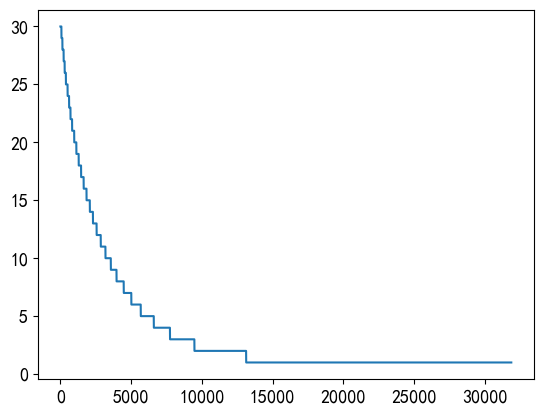

In [24]:
plt.plot(item_click_count[3500:])

In [25]:
tmp = user_click_merge.sort_values('click_timestamp') 
tmp['next_item'] = tmp.groupby(['user_id'])['click_article_id'].transform(lambda x:x.shift(-1))
union_item = tmp.groupby(['click_article_id','next_item'])['click_timestamp'].agg({'count'}).reset_index().sort_values('count', ascending=False)
union_item[['count']].describe()

count
count  433597.000000
mean        3.184139
std        18.851753
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2202.000000

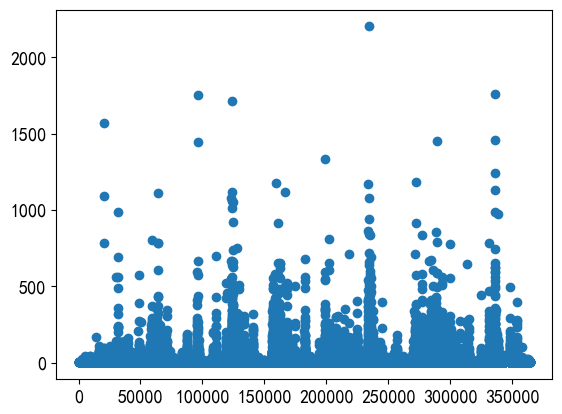

In [26]:
#Áîª‰∏™ÂõæÁõ¥ËßÇÂú∞Áúã‰∏ÄÁúã
x = union_item['click_article_id']
y = union_item['count']
plt.scatter(x, y)

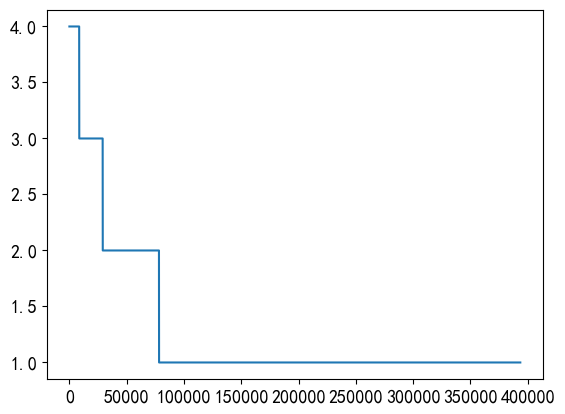

In [27]:
plt.plot(union_item['count'].values[40000:])

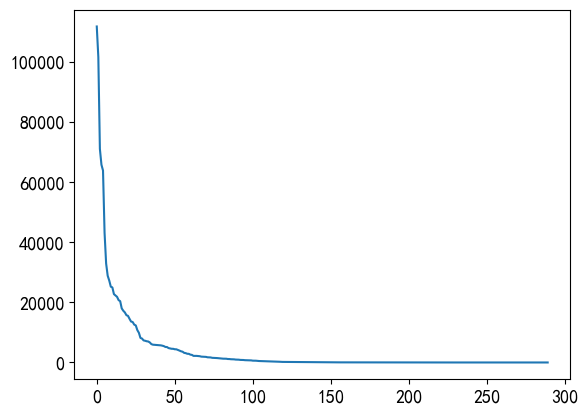

In [28]:
#‰∏çÂêåÁ±ªÂûãÁöÑÊñ∞ÈóªÂá∫Áé∞ÁöÑÊ¨°Êï∞
plt.plot(user_click_merge['category_id'].value_counts().values)

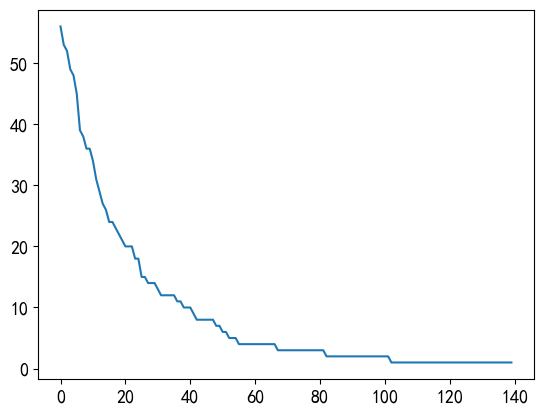

In [29]:
#Âá∫Áé∞Ê¨°Êï∞ÊØîËæÉÂ∞ëÁöÑÊñ∞ÈóªÁ±ªÂûã, Êúâ‰∫õÊñ∞ÈóªÁ±ªÂûãÔºåÂü∫Êú¨‰∏äÂ∞±Âá∫Áé∞ËøáÂá†Ê¨°
plt.plot(user_click_merge['category_id'].value_counts().values[150:])

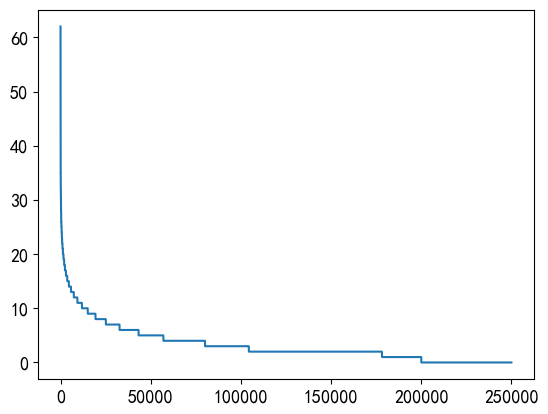

In [30]:
plt.plot(sorted(user_click_merge.groupby('user_id')['category_id'].nunique(), reverse=True))

In [31]:
user_click_merge.groupby('user_id')['category_id'].nunique().reset_index().describe()

user_id    category_id
count  250000.000000  250000.000000
mean   124999.500000       3.256964
std     72168.927986       3.647648
min         0.000000       0.000000
25%     62499.750000       1.000000
50%    124999.500000       2.000000
75%    187499.250000       4.000000
max    249999.000000      62.000000

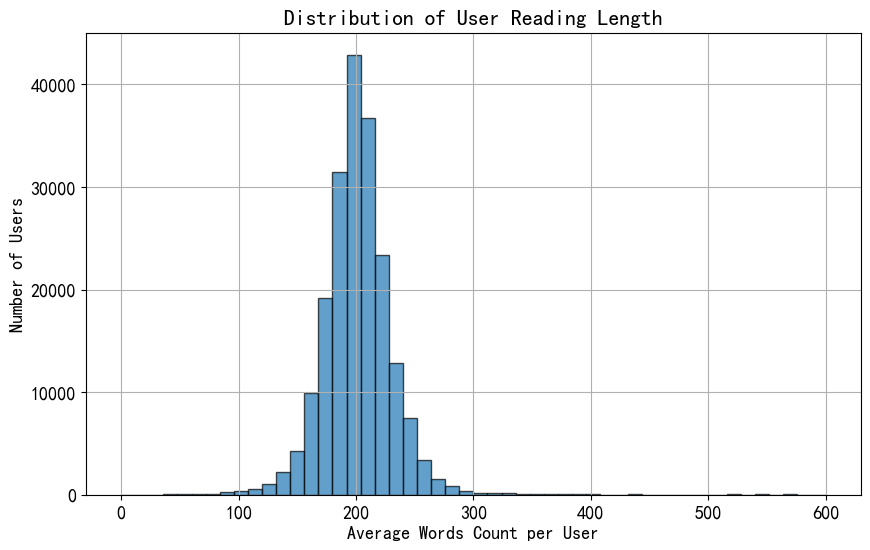

In [36]:
import matplotlib.pyplot as plt

# ËÆ°ÁÆóÊØè‰∏™Áî®Êà∑ÁöÑÂπ≥ÂùáÈòÖËØªÂ≠óÊï∞
user_words_mean = user_click_merge.groupby('user_id')['words_count'].mean()

# ÁªòÂà∂Áõ¥ÊñπÂõæ
plt.figure(figsize=(10, 6))
plt.hist(user_words_mean, bins=50, range=(0, 600), edgecolor='black', alpha=0.7)
plt.xlabel('Average Words Count per User')
plt.ylabel('Number of Users')
plt.title('Distribution of User Reading Length')
plt.grid(True)
plt.show()

In [37]:
#Êõ¥Âä†ËØ¶ÁªÜÁöÑÂèÇÊï∞
user_click_merge.groupby('user_id')['words_count'].mean().reset_index().describe()

user_id    words_count
count  250000.000000  200000.000000
mean   124999.500000     201.307200
std     72168.927986      32.694738
min         0.000000      16.000000
25%     62499.750000     185.000000
50%    124999.500000     200.500000
75%    187499.250000     216.050658
max    249999.000000    3434.500000